# 🗃️ Importing necessary modules

For this demonstration, we'll only use Numpy, Pandas and MatPlotLib.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 📃Preparing and visualizing the data

CC: https://www.kaggle.com/datasets/devzohaib/tvmarketingcsv

In [3]:
df = pd.read_csv("tvmarketing.csv")
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


In [4]:
TARGET = "Sales"
X = df.drop(TARGET, axis=1).to_numpy()
y = df[TARGET]

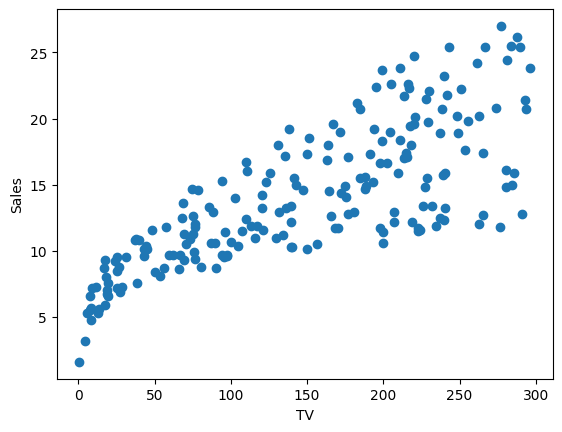

In [5]:
plt.plot(X, y, 'o')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

>   The goal here is to predict the "Sales" variable (y) given the "TV" variable (X).


>   For that, we'll fit the best line to our data points that minimizes the cummulated squared residual loss.
    
>   In other words, we need to find the best parameters: w (weight), b (bias) such that y ~ w * X + b

# ⚒️ Preprocessing

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ⚙️ Custom Linear Regression Implementation

We'll use Stocastic Gradient Descent (SGD) to minimize the cost function, that is the sum of the squares of the residuals.

# 📐 Linear Regression Formulas

In linear regression, we aim to model the relationship between a dependent variable \( y \) and one or more independent variables \( X \). The goal is to find the best-fitting line that minimizes the error between the predicted values and the actual values.

## Hypothesis Function

The hypothesis function for linear regression is given by:

$$ \hat{y} = w \cdot X + b $$

where:
- \( \hat{y} \) is the predicted value
- \( w \) is the weight (coefficient)
- \( X \) is the input feature(s)
- \( b \) is the bias (intercept)

## Cost Function

The cost function used to measure the error of the model is the Mean Squared Error (MSE):

$$ J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 $$

where:
- \( J(w, b) \) is the cost function
- \( n \) is the number of samples
- \( \hat{y}_i \) is the predicted value for the \(i\)-th sample
- \( y_i \) is the actual value for the \(i\)-th sample

## Gradient Descent

To minimize the cost function, we use gradient descent. The update rules for the weights and bias are:

$$ w := w - \alpha \frac{\partial J(w, b)}{\partial w} $$  
$$ b := b - \alpha \frac{\partial J(w, b)}{\partial b} $$

where:
- \( \alpha \) is the learning rate

The partial derivatives of the cost function with respect to \( w \) and \( b \) are:

$$ \frac{\partial J(w, b)}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} 2 (\hat{y}_i - y_i) X_i $$

$$ \frac{\partial J(w, b)}{\partial b} = \frac{1}{n} \sum_{i=1}^{n} 2 (\hat{y}_i - y_i) $$

## Regularization (Optional)

To prevent overfitting, we can add a regularization term to the cost function. For L2 regularization (Ridge), the cost function becomes:

$$ J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2 + \lambda \sum_{j=1}^{m} w_j^2 $$

where:
- \( \lambda \) is the regularization parameter
- \( m \) is the number of features

The gradient update rule with L2 regularization is:

$$ w := w - \frac{\alpha}{n} \left( \sum_{i=1}^{n} 2 (\hat{y}_i - y_i) X_i + 2 \lambda w \right) $$


In [7]:
# You'll also find this code in the "linear_regression.py" file

class LinearRegression:

    def __init__(self, lr = 0.001, n_iters = 10000, lambd = 0):
        
        self.lr = lr
        self.n_iters = n_iters
        self.lambd = lambd

        self.weights = None
        self.bias = None
        self.weights_gradient = None
        self.bias_gradient = None

        self.n_samples = None
        self.n_feats = None


        self.is_fitted = False

    def _init_weights(self):
        self.weights = np.random.rand(self.n_feats)
        self.bias = np.random.rand(1)
        self.weights_gradient = np.empty(self.n_feats)

    
    def get_weights(self):
        return self.weights, self.bias


    def fit(self, X, y):

        assert len(X) == len(y), "X and y must have the same number of samples"
        if len(X.shape) > 1:
            self.n_samples, self.n_feats = X.shape
        else:
            self.n_samples = len(X)
            self.n_feats = 1
            X = X[:, np.newaxis]


        self._init_weights()
        self.weights

        for i in range(self.n_iters + 1):

            y_hat = self.predict(X)
            cost = sum((y_hat - y) ** 2)
            if i % 1000 == 0:
                print(f"Iter: {i}. Total Cost: {cost}. MSE: {cost / self.n_samples}")

            
            self.weights_gradient = np.matmul(2 * (y_hat - y), X) / self.n_samples
            # optional l2 (Ridge) regularization term
            self.weights_gradient = self.weights_gradient + self.lambd * (2 * self.weights) / self.n_samples 
            self.bias_gradient = sum(2 * (y_hat - y)) / self.n_samples

            self.weights = self.weights - self.lr * self.weights_gradient
            self.bias = self.bias - self.lr * self.bias_gradient


        self.is_fitted = True

    
    def predict(self, X):
        if len(X.shape) == 1:
            X = X[:, np.newaxis]
        return np.matmul(X, self.weights) + self.bias
    

    def score(self, y_true, y_pred):

        mae = np.mean(np.abs(y_pred - y_true)).item()
        mse = np.mean((y_pred - y_true) ** 2).item()
        rmse = np.sqrt(mse).item()

        return {
            "mae": mae,
            "mse": mse,
            "rmse": rmse
        }

# 🚂 Fitting the model

In [8]:
regr = LinearRegression()
regr.fit(X_train, y_train)

Iter: 0. Total Cost: 33217.841659859245. MSE: 207.6115103741203
Iter: 1000. Total Cost: 2374.962369007241. MSE: 14.843514806295255
Iter: 2000. Total Cost: 2077.0071320122825. MSE: 12.981294575076765
Iter: 3000. Total Cost: 1990.5915056583094. MSE: 12.441196910364434
Iter: 4000. Total Cost: 1924.4881030922802. MSE: 12.02805064432675
Iter: 5000. Total Cost: 1873.2509025776722. MSE: 11.707818141110451
Iter: 6000. Total Cost: 1833.532430484195. MSE: 11.459577690526219
Iter: 7000. Total Cost: 1802.7431149712077. MSE: 11.267144468570049
Iter: 8000. Total Cost: 1778.875581654943. MSE: 11.117972385343394
Iter: 9000. Total Cost: 1760.3737365459758. MSE: 11.00233585341235
Iter: 10000. Total Cost: 1746.0313129741571. MSE: 10.912695706088481


In [9]:
weights, bias = regr.get_weights()
print(f"Weight(s): {weights}. Bias: {bias}")

Weight(s): [11.81962272]. Bias: [8.19803025]


In [10]:
preds = regr.predict(X_test)
eval_metrics = regr.score(y_true = y_test,
                          y_pred = preds)
eval_metrics

{'mae': 2.61159368064677,
 'mse': 11.014549363285608,
 'rmse': 3.3188174645927138}

# 🗺️ Visualizing our predictions

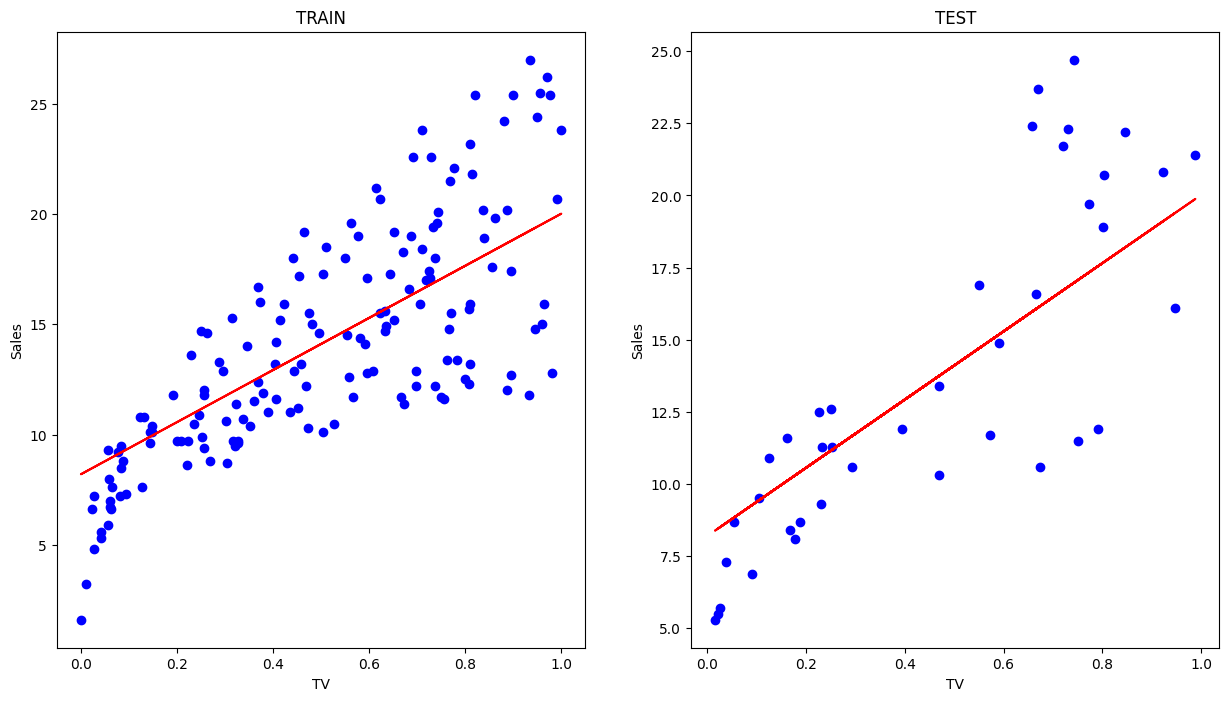

In [11]:
y_train_preds = regr.predict(X_train)
y_test_preds = regr.predict(X_test)

plt.figure(figsize = (15, 8))

plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, c="b")
plt.plot(X_train, y_train_preds, c="r")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TRAIN")

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, c="b")
plt.plot(X_test, y_test_preds, c="r")
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TEST")

plt.show();

Done 🙌